<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-modules" data-toc-modified-id="Load-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load modules</a></span></li><li><span><a href="#Some-functions" data-toc-modified-id="Some-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Some functions</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Plot-an-example" data-toc-modified-id="Plot-an-example-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot an example</a></span></li><li><span><a href="#Plot-with-weighted-edges" data-toc-modified-id="Plot-with-weighted-edges-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plot with weighted edges</a></span></li></ul></li><li><span><a href="#Community-detection" data-toc-modified-id="Community-detection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Community detection</a></span><ul class="toc-item"><li><span><a href="#Plot-with-colours-indicating-communities" data-toc-modified-id="Plot-with-colours-indicating-communities-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot with colours indicating communities</a></span></li></ul></li><li><span><a href="#Try-undirected" data-toc-modified-id="Try-undirected-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Try undirected</a></span></li></ul></div>

# Community Detection Example

This notebook is adapted from Damhán's `csv_to_nx_graph.py`

## Load modules

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D

## Some functions

In [2]:
def graph_of_data(df):
    """
    Input: an election dataframe for a constitutency.
    Output: a NetworkX weighted digraph representing the transfers between candidates.
    Does this by filtering the inputted dataframe by count, then extracting the values of transfers using Pandas.

    """
    
    #--Merge these columns, will be labels of the nodes
    df["Name"] = df["Candidate surname"].astype("str") +" " + df["Candidate First Name"].astype("str")
    #--Create the DiGraph
    G = nx.DiGraph()
    count_lst = list(df["Count Number"].unique())
    #--There are no transfers on the first count so we will ignore
    count_lst.remove(1)
    #--Filter by count
    for count in count_lst:
        count_df = df[df["Count Number"]==count]
        #--filter by candidates whose votes are transferred
        src_cands = count_df[count_df["Transfers"]<0]
        #--filter by candidates who receive these transfers
        to_cands =count_df[count_df["Transfers"]>0]
        #--get these list of candidates to create the graph below
        src_names = list(src_cands["Name"].values)
        to_names = list(to_cands["Name"].values)

        #--add edge weights as: the amount of votes transferred to a candidate as a proportion of the total votes transferred per count
        src_wgts = list(src_cands["Transfers"].values)
        to_wgts = list(to_cands["Transfers"].values)

            #--if there's more than one src_cand per count, the number of transfers a candidate receives will be
            #--a proportion of this total
        total = np.abs(np.sum(src_wgts))

        wgts = [round(wgt/total, 2) for wgt in to_wgts]
            
        #--Create a weighted edge between each source candidate and each target candidate
        for i in range(len(src_names)):
            for j in range(len(to_names)):
                G.add_edge(src_names[i],to_names[j],weight=wgts[j])
    return G

In [3]:
def plot_G(G, layout="circular"):
    """
    Input: a NetworkX weighted DiGraph.
    Each edge in the graph has a 'weight' attribute created in above function, that is used by NetworkX default method get_edge_attributes().
    Output: a circular graph, labelled with transfers between candidates.
    
    """
    
    plt.figure(figsize=(12, 12))
    
    opts = {"with_labels":True,"node_size":600}
    
    if (layout=="circular"):
        nx.draw_circular(G,**opts)
    else:
        nx.draw(G,**opts)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G), edge_labels=edge_labels)
    
    plt.title("Graph of Transfers between Candidates")
    plt.show()

## Load data

In [4]:
# full_df = pd.read_csv("General_Election_2020_full.csv", encoding="utf-8")
full_df = pd.read_csv("2020-05-27_general-election-2020-countdetails-csv_en.csv", encoding="latin-1")

In [5]:
constituency_list = list(full_df["Constituency Name"].unique())
print(constituency_list) 

['Carlow-Kilkenny', 'Cavan-Monaghan', 'Clare', 'Cork East', 'Cork North Central', 'Cork North West', 'Cork South Central', 'Cork South West', 'Donegal', 'Dublin Bay North', 'Dublin Bay South', 'Dublin Central', 'Dublin Fingal', 'Dublin Mid West', 'Dublin North West', 'Dublin Rathdown', 'Dublin South Central', 'Dublin South West', 'Dublin West', 'Dun Laoghaire', 'Galway East', 'Galway West', 'Kerry', 'Kildare North', 'Kildare South', 'Laois Offaly', 'Limerick City', 'Limerick County', 'Longford Westmeath', 'Louth', 'Mayo', 'Meath East', 'Meath West', 'Roscommon - Galway', 'Sligo Leitrim', 'Tipperary', 'Waterford', 'Wexford', 'Wicklow']


In [6]:
constituency = "Galway East" #enter a constituency as printed above
constituency_df = full_df.loc[full_df["Constituency Name"]==constituency]
# print(constituency_df)

### Plot an example

/tmp/ipykernel_19786/1158756584.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Name"] = df["Candidate surname"].astype("str") +" " + df["Candidate First Name"].astype("str")


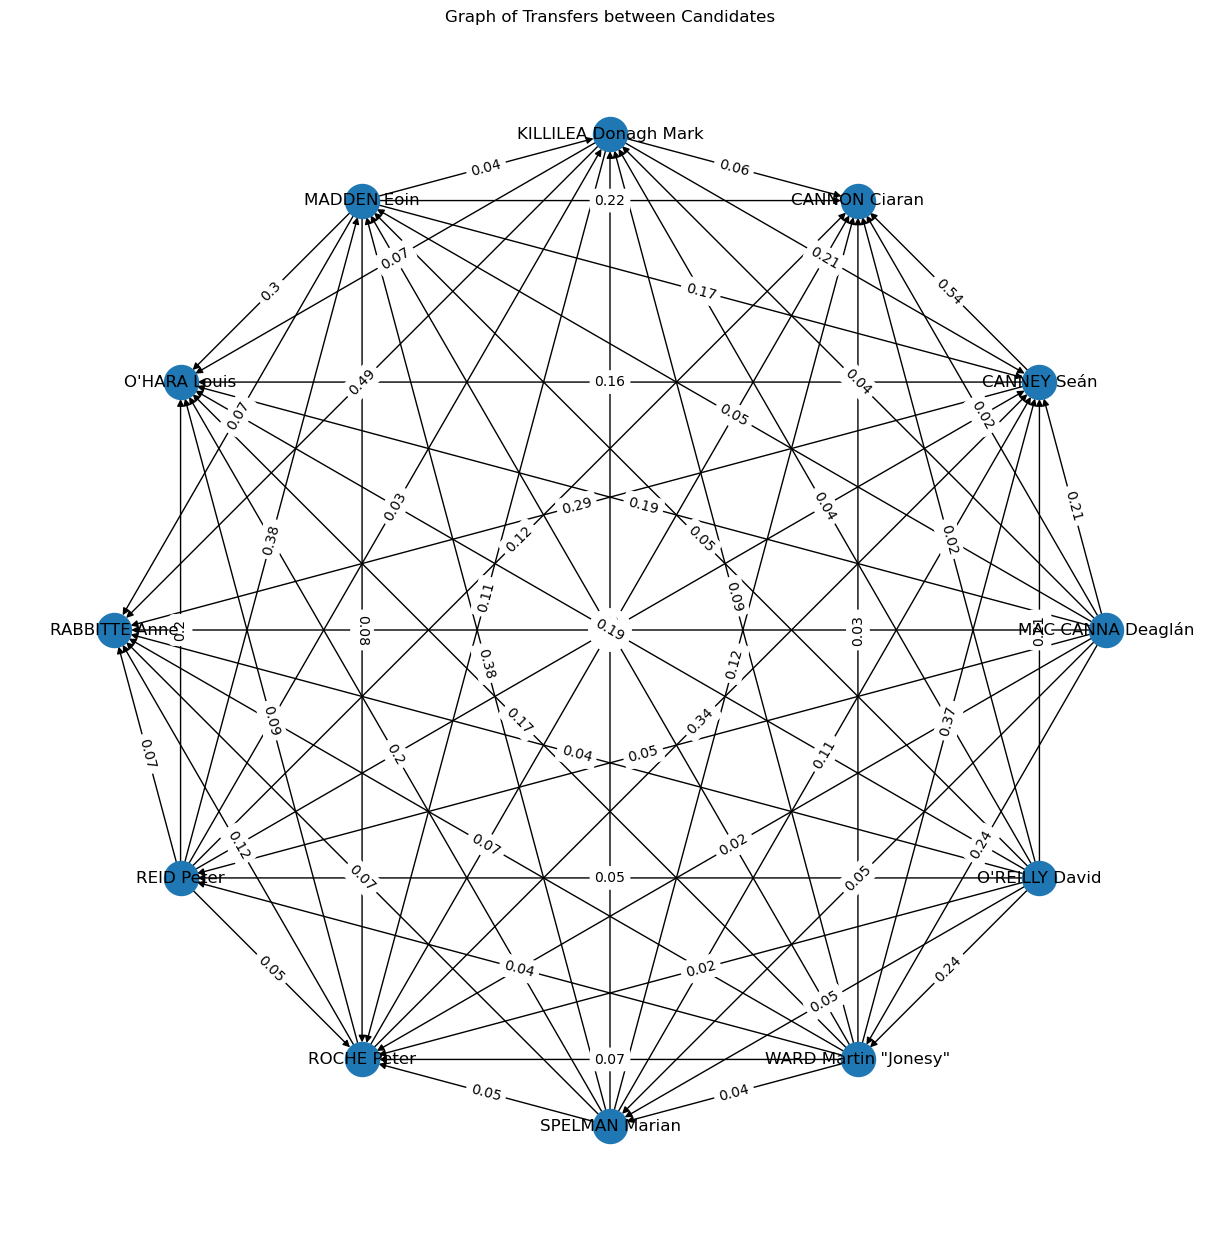

In [7]:
G = graph_of_data(constituency_df)
plot_G(G)

### Plot with weighted edges

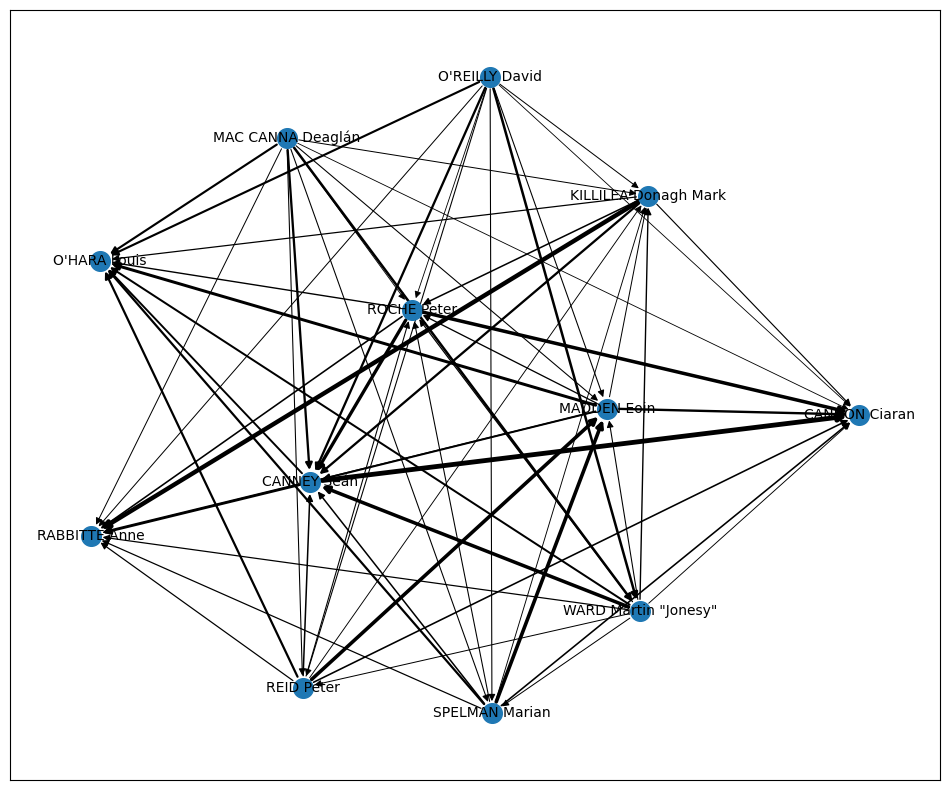

In [8]:
plt.figure(figsize=(12, 10))
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp") # good for labelled data
label_pos = {n: (x, y-0.04) for n, (x, y) in pos.items()}
weights = nx.get_edge_attributes(G, 'weight')
min_w, max_w = 0.5, 6.0
edge_widths = [min_w + w*(max_w - min_w) for (_, _), w in weights.items()]
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos, width=edge_widths);
nx.draw_networkx_labels(
    G, label_pos,
    font_size=10,
    horizontalalignment='center'
);

## Community detection

In [9]:
communities = nx.community.louvain_communities(G, seed=42) #set seed for deterministic communities.
print(f"Communities produced by Louvain algorithm for {constituency}:\n")
for c in communities:
    print(f"{c}\n")
    
modularity = nx.community.modularity(G, communities)
print(f"Constituency: {constituency} has modularity {modularity:.4}")

Communities produced by Louvain algorithm for Galway East:

{'KILLILEA Donagh Mark', 'CANNON Ciaran', 'CANNEY Seán', 'ROCHE Peter', 'RABBITTE Anne'}

{'REID Peter', 'SPELMAN Marian', "O'HARA Louis", 'MADDEN Eoin'}

{'WARD Martin "Jonesy"', "O'REILLY David", 'MAC CANNA Deaglán'}

Constituency: Galway East has modularity 0.1955


### Plot with colours indicating communities

In [10]:
community_colours = ["red", "blue", "green", "orange"]
nodes = list(G.nodes())
node_colors = []

for n in nodes:
    for i, comm in enumerate(communities):
        if n in comm:
            node_colors.append(community_colours[i])
            break

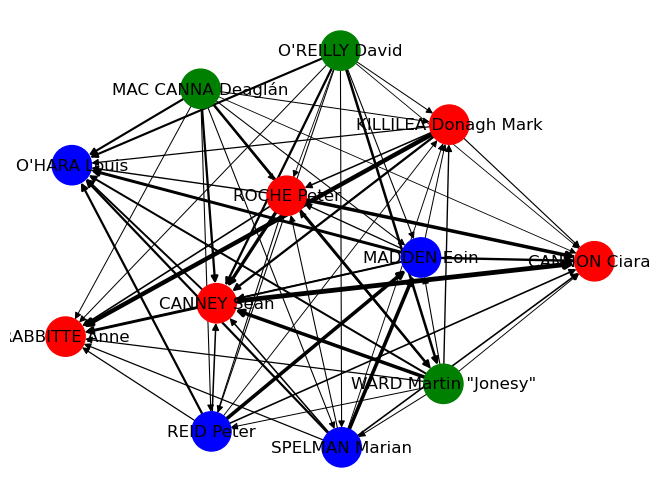

In [11]:
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=800, width=edge_widths)

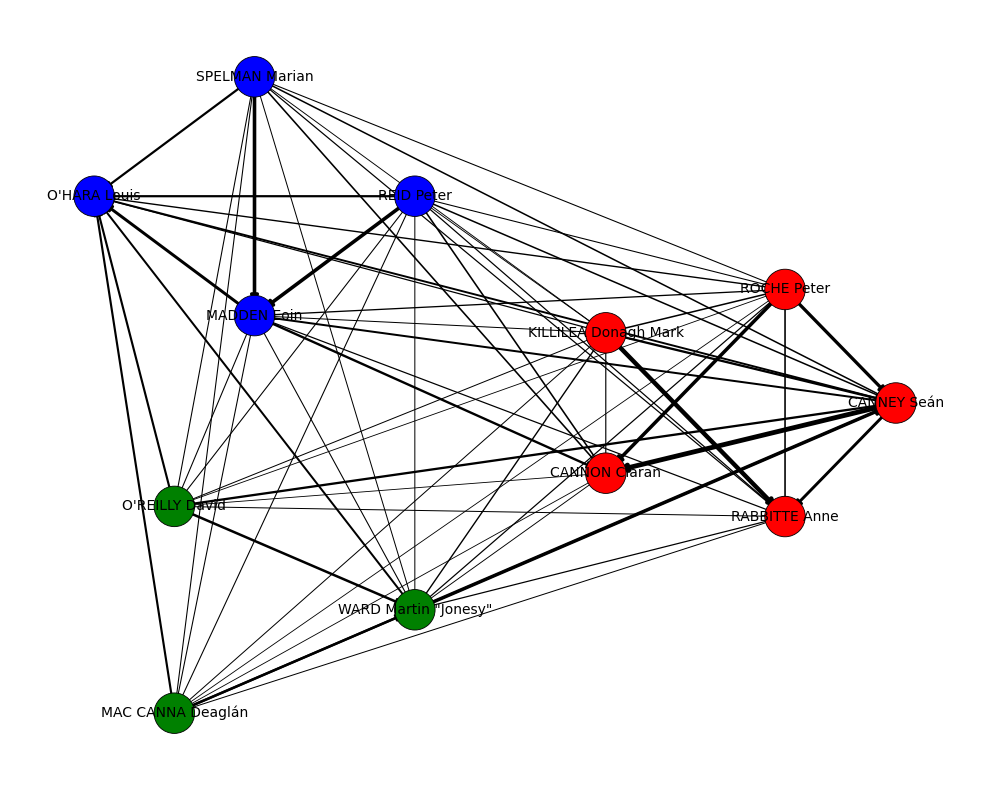

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

comm_id = {}
for i, comm in enumerate(communities):
    for n in comm:
        comm_id[n] = i

# 2) Build a contracted "community graph" (super-graph)
H = nx.Graph()
H.add_nodes_from(range(len(communities)))  # one node per community

# Add weighted edges between communities based on total inter-community edge weight
for u, v, d in G.edges(data=True):
    cu, cv = comm_id[u], comm_id[v]
    if cu != cv:
        w = d.get('weight', 1.0)
        if H.has_edge(cu, cv):
            H[cu][cv]['weight'] += w
        else:
            H.add_edge(cu, cv, weight=w)

# 3) Lay out community centroids (use a force-directed layout on H)
centroid_pos = nx.circular_layout(H, scale=0.5)  # good spacing for small graphs
#centroid_pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")

# 4) Lay out nodes within each community around its centroid
pos = {}
for i, comm in enumerate(communities):
    # local layout for the community subgraph
    subG = G.subgraph(comm)
    local = nx.circular_layout(subG)  # compact local layout

    # translate local positions to the community centroid
    cx, cy = centroid_pos[i]
    # scale to keep the community tight; tweak 'scale' if you want bigger clusters
    scale = 0.25
    for n, (x, y) in local.items():
        pos[n] = (cx + scale * x, cy + scale * y)

# 5) Draw with your existing colours and edge widths
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=850, edgecolors='k', linewidths=0.6)
nx.draw_networkx_edges(G, pos, width=edge_widths)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis('off')
plt.tight_layout()
plt.show()